## TP 1 Différences finies

**Objectifs du TP**

L’objectif de ce TP est de résoudre l'équation d’advection 1D à l’aide de plusieurs schémas différences finies. On
rappelle que cette équation d’advection 1D peut s’écrire :

$$
\frac{\partial u}{\partial t} + \alpha \frac{\partial u}{\partial x} = 0
$$

# 1 Construction et visualisation du maillage et de la condition initiale

On considère un domaine 1D de longueur $L$, discrétisé en m points. Les deux conditions initiales envisagées sont les suivantes :

$CI1 : u^0 = sin(\frac{2\beta x_i \pi}{L}) \text{, où } \beta \text{ est le numéro du mode considéré}$

$CI2 : u^0 = 0 \text{, si } x < x_0 \text{, } u^0 = 1 \text{ sinon}$

Pour commencer, on choisira les valeurs numériques suivantes : $L = 1$ m, $m = 50$ et $x_0 = 0.5$ m.

Construire les tableaux $x$, contenant les abscisses des points du maillage, et $u^0$, la solution initiale, puis les visualiser avec Matplotlib.

In [76]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# Paramètres
L = 1.0   # Longueur du domaine
m = 50    # Nombre de points de discrétisation
beta = 1  # Paramètre du mode pour CI1
x0 = 0.5  # Position de la discontinuité pour la condition initiale CI2

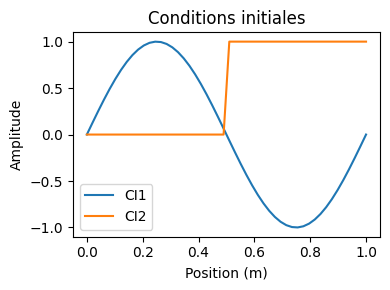

In [78]:
# Définition des conditions initiales
def condition1(x, beta):
    return np.sin(2 * beta * x * np.pi / L)

def condition2(x, x0):
    return np.where(x < x0, 0, 1)

# Construction du maillage
x = np.linspace(0, L, m)

u0_CI1 = condition1(x, beta)
u0_CI2 = condition2(x, x0)

# Visualisation
plt.figure(figsize=(4, 3))

plt.plot(x, u0_CI1, label='CI1')
plt.plot(x, u0_CI2, label='CI2')

plt.title('Conditions initiales')
plt.xlabel('Position (m)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

# 2 Etude du comportement de schémas diﬀérences ﬁnies

**2.1 Paramètres physiques et numériques**

Par la suite, on considèrera le problème physique suivant (sauf indication contraire dans l’énoncé) :

- Vitesse de convection $a = 1$ m/s
- Conditions limites périodiques en espace
- Solution observée au terme d’un temps $T$ lui permettant de revenir à sa position initiale.

On rappelle que le nombre de Courant, noté $\mathcal{C}$, est déﬁni comme :
$$
\mathcal{C} = \frac{a \Delta t}{\Delta x}
$$

Ce nombre sera pris égal à $0.5$ par défaut.

In [79]:
# Paramètres
L = 1.0   # Longueur du domaine
x0 = 0.5  # Position de la discontinuité pour la condition initiale CI2

a = 1.0   # Vitesse de convection (m/s)
C_default = 0.5  # Nombre de Courant par défaut

**2.2 Schémas numériques à implémenter**

- Schéma FOU-EE :
$$
u_i ^{n+1} = u_i ^{n} - \mathcal{C}(u_i ^{n} - u_{i-1} ^{n})
$$

- Schéma FOF-EE :
$$
u_i ^{n+1} = u_i ^{n} - \mathcal{C}(u_{i+1} ^{n} - u_{i} ^{n})
$$

- Schéma SOC-EE :
$$
u_i ^{n+1} = u_i ^{n} - \frac{\mathcal{C}}{2}(u_{i+1} ^{n} - u_{i-1} ^{n})
$$

- Schéma de Lax-Wendroﬀ :
$$
u_i ^{n+1} = u_i ^{n} - \frac{\mathcal{C}}{2}(u_{i+1} ^{n} - u_{i-1} ^{n}) + \frac{\mathcal{C}^2}{2}(u_{i+1} ^{n} - 2 u_{i} ^{n} + u_{i-1} ^{n})
$$

In [80]:
# Schémas numériques à implémenter
def scheme_FOU_EE(u, C):
    return u - C * (u - np.roll(u, 1))

def scheme_FOF_EE(u, C):
    return u - C * (np.roll(u, -1) - u)

def scheme_SOC_EE(u, C):
    return u - 0.5 * C * (np.roll(u, -1) - np.roll(u, 1))

def scheme_Lax_Wendroff(u, C):
    return u - 0.5 * C * (np.roll(u, -1) - np.roll(u, 1)) + 0.5 * C**2 * (np.roll(u, -1) - 2 * u + np.roll(u, 1))

# Affichage des schémas numériques
def afficher_schemas(u0, C, m = 50, scheme_list = [scheme_FOU_EE, scheme_FOF_EE, scheme_SOC_EE, scheme_Lax_Wendroff]):
    # Construction du maillage
    x = np.linspace(0, L, m)
    
    # Calcul des pas
    dx = L / (m - 1)
    dt = C * dx / a
    
    T = L / a  # Temps final
    
    #plt.subplot(len(scheme_list), 1, 1)
    plt.figure(figsize=(15, 3))
    
    for i, scheme in enumerate(scheme_list):
        # Initialisation
        u = np.copy(u0)
        
        # Itérations temporelles
        for n in range(int(T / dt) - 1):
            u = scheme(u, C)

        # Visualisation
        plt.subplot(1, len(scheme_list), i + 1)
        
        plt.title('Solution pour le schéma ' + scheme.__name__)
        
        plt.plot(x, u0, label='T = 0')
        plt.plot(x, u, label='T = 1')
        plt.legend()
        
    plt.tight_layout()
    plt.show()

**2.3 Méthodologie**

Pour chaque schéma numérique implémenté, on répondra aux questions suivantes :

1. Visualiser les solutions obtenues en partant de la condition initiale $CI1$, en utilisant successivement des valeurs de $\beta$ égales à $2$, $4$, $8$ et $16$ et noter vos observations.

2. Pour la condition initiale correspondant à $\beta = 1$, réaliser des simulations avec les nombres $C$ égaux à $0.1$, $0.2$, $0.4$, $0.8$, $1$, $1.5$ et noter vos observations.

3. Utiliser maintenant la condition initiale $CI2$. Sortir la solution à $\mathcal{C} = 1$ aux instants suivants : $T/8$, $T/4$, $T/2$ et enﬁn $T$.

4. Refaire l’étude sur l’inﬂuence du nombre $\mathcal{C}$ avec la condition initiale $CI2$.

5. Toujours avec $CI2$ et $\mathcal{C} = 0.5$, étudiez l’inﬂuence de la discrétisation spatiale sur le résultat en prenant successivement un nombre de points $m$ égal à $4$, $10$, $20$, $50$, $100$ et $200$.

6. Que se passe-t-il si l’on change le signe de $a$ ?

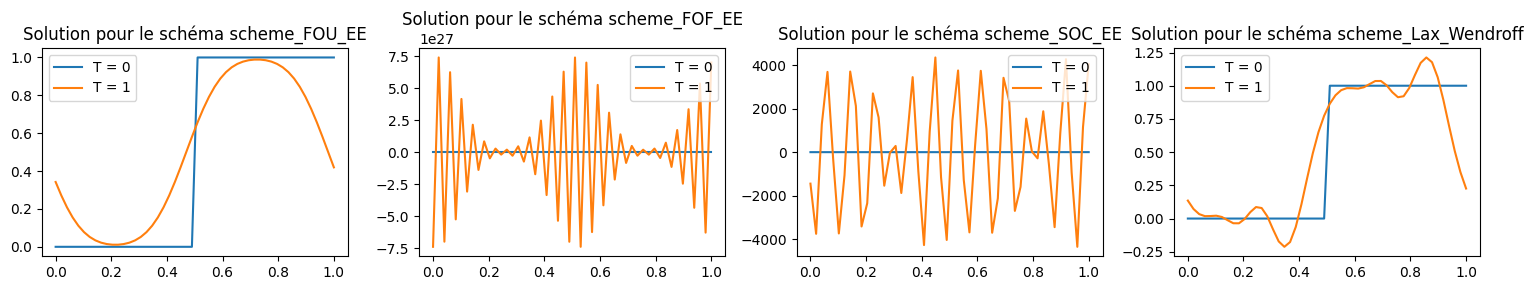

In [81]:
# Affichage des schémas numériques pour la condition initiale CI2
x = np.linspace(0, L, m)
u0_CI1 = condition2(x, x0)
afficher_schemas(u0_CI1, C_default)

beta = 2


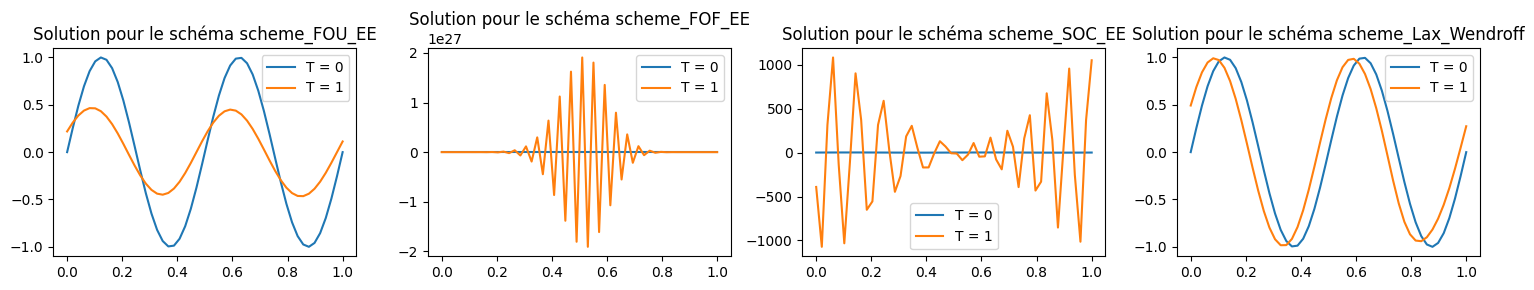

beta = 4


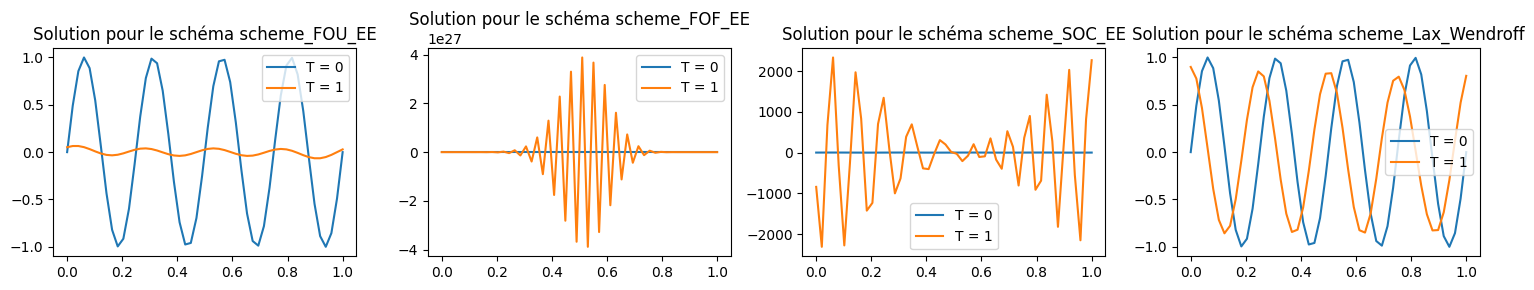

beta = 8


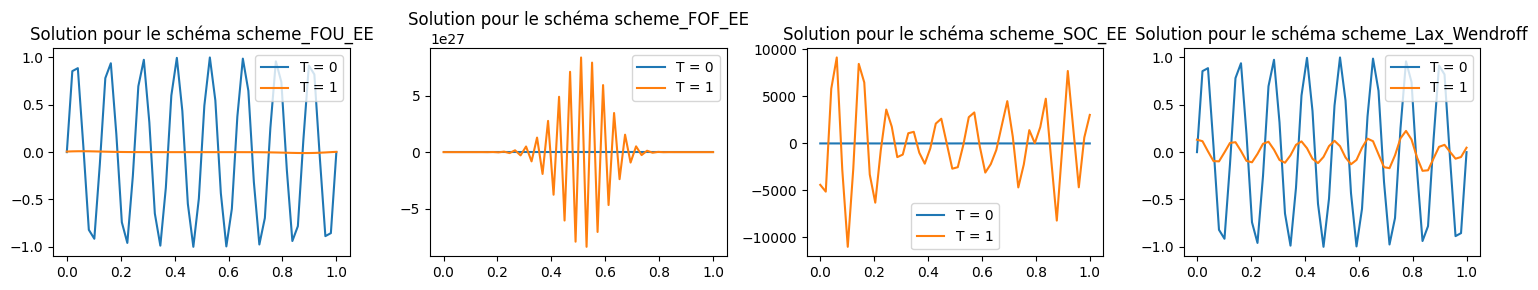

beta = 16


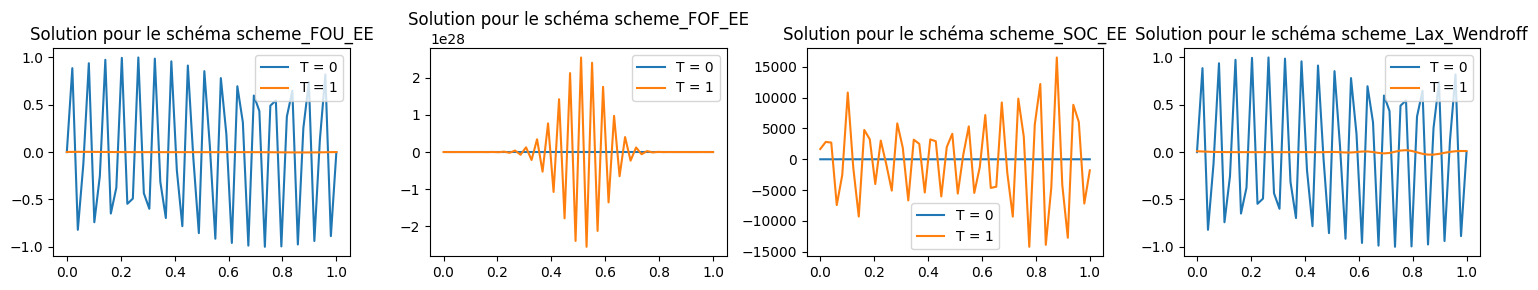

In [82]:
# Simulation et visualisation avec CI1 et différents beta
betas = [2, 4, 8, 16]
for beta_value in betas:
    x = np.linspace(0, L, m)
    u0_CI1 = condition1(x, beta_value)
    print('beta =', beta_value)
    afficher_schemas(u0_CI1, C_default)

C = 0.1


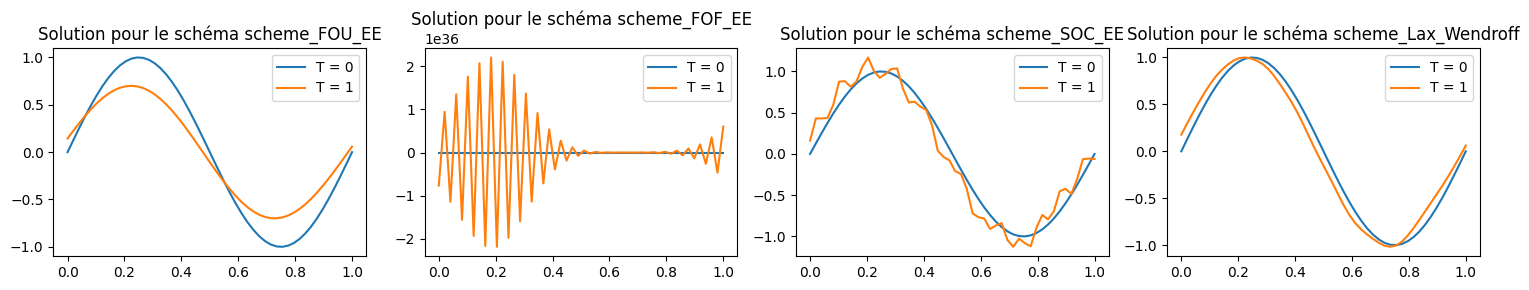

C = 0.2


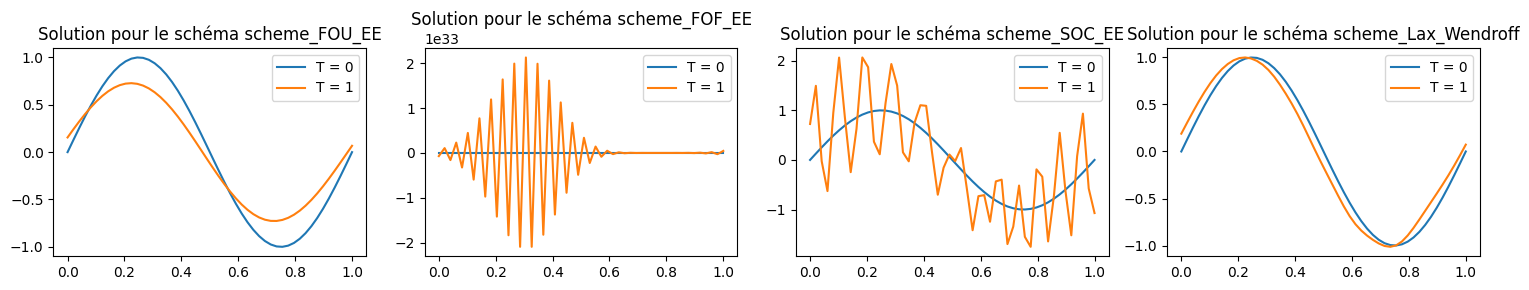

C = 0.4


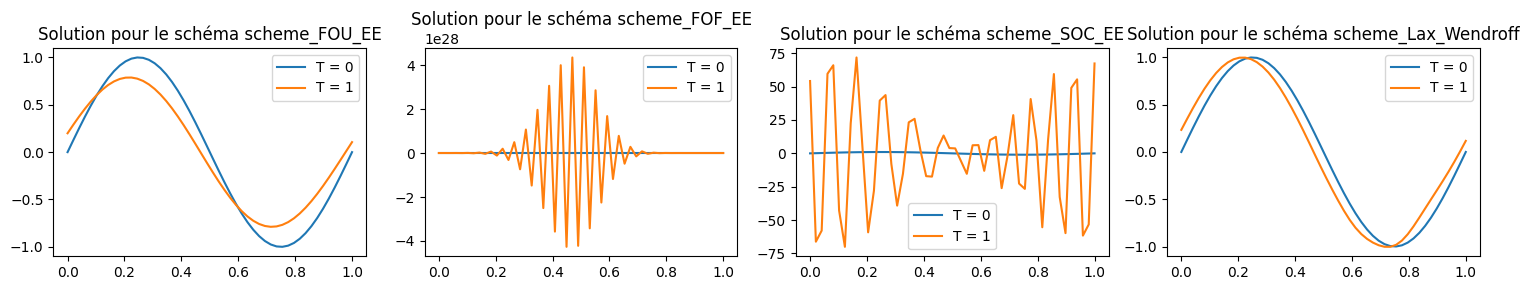

C = 0.8


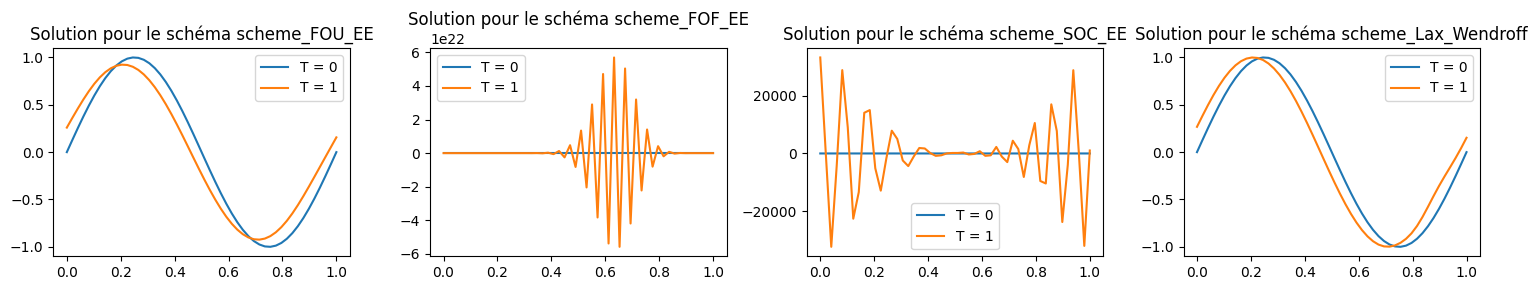

C = 1


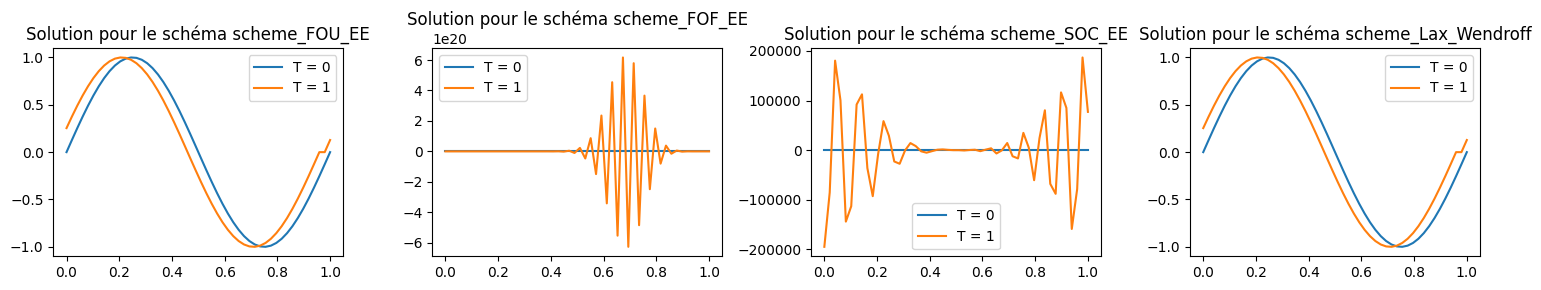

C = 1.5


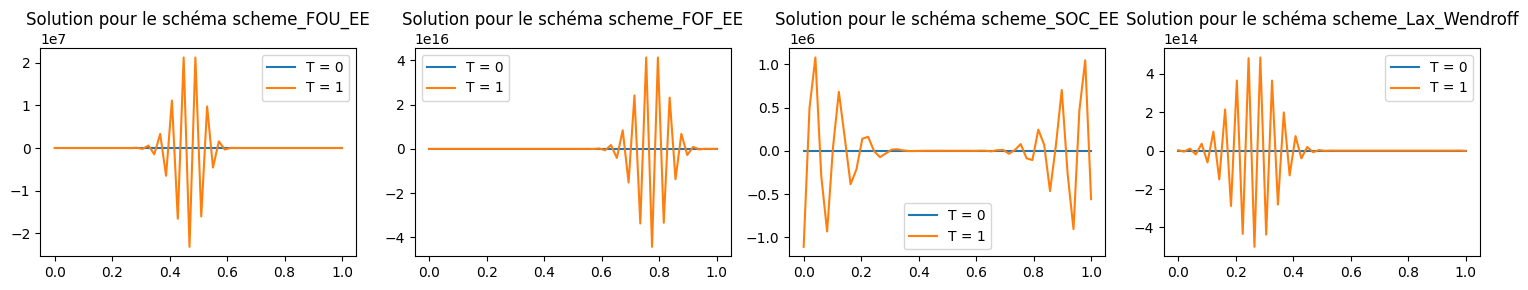

In [83]:
# Simulation et visualisation avec CI1 et différents C
C_values_CI1 = [0.1, 0.2, 0.4, 0.8, 1, 1.5]
beta = 1
for C_value in C_values_CI1:
    x = np.linspace(0, L, m)
    u0_CI1 = condition1(x, beta)
    print('C =', C_value)
    afficher_schemas(u0_CI1, C_value)

In [84]:
# Simulation et visualisation avec CI2 à différents instants T


In [85]:
# Simulation et visualisation avec CI2 et différents C


In [86]:
# Simulation et visualisation avec CI2, C=0.5, et différents m


In [87]:
# Simulation et visualisation avec CI2, C=0.5, et a=-1
